In [1]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = '../train_audio/apapan/XC27317_source0_.wav'

In [2]:
def noise_reduction(y, sr, plot=True, th=0.3):
    from scipy.fft import fft, fftfreq, ifft
    
    SAMPLE_RATE = 1
    DURATION = len(y) / SAMPLE_RATE
    N = int(SAMPLE_RATE * DURATION)

    yf = fft(y)
    xf = fftfreq(N, 1 / SAMPLE_RATE)
    
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(24, 8))
        axes[0].plot(np.arange(len(y)), y)
        axes[0].set_title('Before Time-Domain')
        axes[1].plot(xf, np.abs(yf))
        axes[1].set_title('Before Frequency-Domain')
        plt.show()
    
    # Filtering Low-Pass
    new_yf = yf.copy()
    middle = len(y) / 2
    new_yf[int(middle - len(y) * th):int(middle + len(y) * th)] = 0
    new_y = ifft(new_yf)
    new_y = new_y.real
    
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(24, 8))
        axes[0].plot(np.arange(len(y)), new_y)
        axes[0].set_title('After Time-Domain')
        axes[1].plot(xf, np.abs(new_yf))
        axes[1].set_title('After Frequency-Domain')
        plt.show()

    return new_y, sr

'Audio'

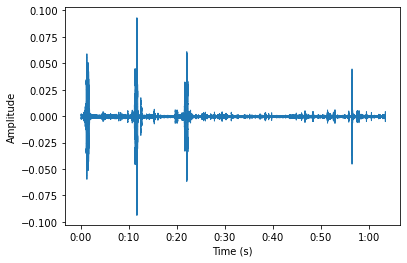

'Audio with noise reduction'

'Audio with noise reduction'

'Audio with noise reduction'

'Audio with noise reduction'

'Audio with noise reduction'

[array([[-68.20443 , -61.162453, -60.04747 , ..., -71.15328 , -69.49746 ,
         -72.74675 ],
        [-69.5829  , -66.69917 , -70.80935 , ..., -72.405075, -73.507454,
         -71.51529 ],
        [-68.306625, -63.984596, -69.56525 , ..., -71.62879 , -71.151634,
         -73.90481 ],
        ...,
        [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
         -80.      ],
        [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
         -80.      ],
        [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
         -80.      ]], dtype=float32),
 array([[-79.457504, -75.431366, -73.52261 , ..., -70.1082  , -75.7895  ,
         -72.4981  ],
        [-80.      , -76.36889 , -76.08382 , ..., -75.85991 , -76.52032 ,
         -71.700264],
        [-75.38764 , -71.34047 , -74.88229 , ..., -74.17328 , -73.81946 ,
         -72.05752 ],
        ...,
        [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
         -80.      

In [5]:
def get_spectrograms(filename):
    audio, sr = librosa.load(filename)
    clips = librosa.effects.split(audio, top_db=25)
    
    display("Audio", ipd.Audio(data=audio, rate=sr))
    plt.figure()
    librosa.display.waveshow(audio, sr=sr)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()
    
    audio_len = len(audio)
    # 5 seconds chunk
    chunk_duration = 5
    buffer = sr * chunk_duration
    buffer_curr = 0
    
    spectrograms = []
    while buffer_curr < audio_len:
        if buffer > (audio_len - buffer_curr):
            buffer = audio_len - buffer_curr
        
        is_silent = True
        for c in clips:
            if len(range(max(buffer_curr, c[0]), min(buffer_curr + buffer, c[-1])+1)) > 0:
                is_silent = False
                break

        if is_silent:
            buffer_curr += buffer
            continue
            
        y = audio[buffer_curr:(buffer_curr + buffer)]
        # display("Audio with noise", ipd.Audio(data=y, rate=sr))
        nr_y, nr_sr = noise_reduction(y, sr, plot=False, th=0.3)
        display("Audio with noise reduction", ipd.Audio(data=nr_y, rate=sr))
        
        buffer_curr += buffer

        S = librosa.feature.melspectrogram(y=nr_y, sr=nr_sr)
        S_DB = librosa.power_to_db(S, ref=np.max)
        if S_DB.shape != (128,216):
            temp = np.full((128,216),-80)
            temp[:S_DB.shape[0],:S_DB.shape[1]] = S_DB
            S_DB = temp
        spectrograms.append(S_DB)
    return spectrograms

get_spectrograms(filename)